## Set Dataset Path

In [1]:
FOLDER_PATH = "D:/VIT-MCA/Second Sem/SET and DM/Retinal Disease Classification" 

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
from keras.applications.vgg19 import VGG19
from keras.applications.efficientnet_v2 import EfficientNetV2M
from keras.applications.convnext import ConvNeXtLarge
from keras.models import load_model
from keras.models import save_model
import random

pd.options.display.max_columns = 50

In [3]:
tf. __version__

'2.10.1'

## Importing Dataset

In [4]:
train_df = pd.read_csv(f'{FOLDER_PATH}/Training_Set/Training_Set/RFMiD_Training_Labels.csv')
val_df = pd.read_csv(f'{FOLDER_PATH}/Evaluation_Set/Evaluation_Set/RFMiD_Validation_Labels.csv')
test_df = pd.read_csv(f'{FOLDER_PATH}/Test_Set/Test_Set/RFMiD_Testing_Labels.csv')

## Data Preprocessing

### Create Cropped Images

In [5]:
'''

import cv2
import os

# Define the cropping function
def crop_image1(image):
    x = 360  # x-coordinate of top-left corner
    y = 0  # y-coordinate of top-left corner
    width = 1424  # Width of the cropped region
    height = 1424  # Height of the cropped region
    
    cropped_image = image[y:y+height, x:x+width]
    
    return cropped_image

def crop_image2(image):
    x = 256  # x-coordinate of top-left corner
    y = 0  # y-coordinate of top-left corner
    width = 1536  # Width of the cropped region
    height = 1536  # Height of the cropped region
    
    cropped_image = image[y:y+height, x:x+width]
    
    return cropped_image

def crop_image3(image):
    x = 200  # x-coordinate of top-left corner
    y = 0  # y-coordinate of top-left corner
    width = 3552  # Width of the cropped region
    height = 2848  # Height of the cropped region
    
    cropped_image = image[y:y+height, x:x+width]
    
    return cropped_image

# Define the directories containing the images
train_image_dir = f'{FOLDER_PATH}/Training_Set/Training_Set/Training/'
val_image_dir = f'{FOLDER_PATH}/Evaluation_Set/Evaluation_Set/Validation/'
test_image_dir = f'{FOLDER_PATH}/Test_Set/Test_Set/Test/'

# Define the output directories for cropped images
train_output_dir = f'{FOLDER_PATH}/Training_Set/Training_Set/Training_Cropped/'
val_output_dir = f'{FOLDER_PATH}/Evaluation_Set/Evaluation_Set/Validation_Cropped/'
test_output_dir = f'{FOLDER_PATH}/Test_Set/Test_Set/Test_Cropped/'

# Create the output directories if they don't exist
os.makedirs(train_output_dir, exist_ok=True)
os.makedirs(val_output_dir, exist_ok=True)
os.makedirs(test_output_dir, exist_ok=True)

# Iterate over the image files in the directory
for filename in os.listdir(train_image_dir):
    # Load the image
    image_path = os.path.join(train_image_dir, filename)
    image = cv2.imread(image_path)
    
    # Apply the crop function
    if image.shape[0] == 1424:
        cropped_image = crop_image1(image)
    elif image.shape[0] == 1536:
        cropped_image = crop_image2(image)
    elif image.shape[0] == 2848:
        cropped_image = crop_image3(image)
    
    # Save the cropped image
    output_path = os.path.join(train_output_dir, filename)
    cv2.imwrite(output_path, cropped_image)

for filename in os.listdir(val_image_dir):
    # Load the image
    image_path = os.path.join(val_image_dir, filename)
    image = cv2.imread(image_path)
    
    # Apply the crop function
    if image.shape[0] == 1424:
        cropped_image = crop_image1(image)
    elif image.shape[0] == 1536:
        cropped_image = crop_image2(image)
    elif image.shape[0] == 2848:
        cropped_image = crop_image3(image)
    
    # Save the cropped image
    output_path = os.path.join(val_output_dir, filename)
    cv2.imwrite(output_path, cropped_image)

for filename in os.listdir(test_image_dir):
    # Load the image
    image_path = os.path.join(test_image_dir, filename)
    image = cv2.imread(image_path)
    
    # Apply the crop function
    if image.shape[0] == 1424:
        cropped_image = crop_image1(image)
    elif image.shape[0] == 1536:
        cropped_image = crop_image2(image)
    elif image.shape[0] == 2848:
        cropped_image = crop_image3(image)
    
    # Save the cropped image
    output_path = os.path.join(test_output_dir, filename)
    cv2.imwrite(output_path, cropped_image)

'''

"\n\nimport cv2\nimport os\n\n# Define the cropping function\ndef crop_image1(image):\n    x = 360  # x-coordinate of top-left corner\n    y = 0  # y-coordinate of top-left corner\n    width = 1424  # Width of the cropped region\n    height = 1424  # Height of the cropped region\n    \n    cropped_image = image[y:y+height, x:x+width]\n    \n    return cropped_image\n\ndef crop_image2(image):\n    x = 256  # x-coordinate of top-left corner\n    y = 0  # y-coordinate of top-left corner\n    width = 1536  # Width of the cropped region\n    height = 1536  # Height of the cropped region\n    \n    cropped_image = image[y:y+height, x:x+width]\n    \n    return cropped_image\n\ndef crop_image3(image):\n    x = 200  # x-coordinate of top-left corner\n    y = 0  # y-coordinate of top-left corner\n    width = 3552  # Width of the cropped region\n    height = 2848  # Height of the cropped region\n    \n    cropped_image = image[y:y+height, x:x+width]\n    \n    return cropped_image\n\n# Define th

### Merge Disease Labels with <10 Images into 'Other' category

In [6]:
small_labels = ['CWS', 'CB', 'ODPM', 'PRH', 'MNF', 'HR', 'CRAO', 'TD', 'CME', 'PTCR', 'CF', 'VH', 'MCA', 'VS', 'BRAO', 'PLQ', 'HPED', 'CL']
train_df['OTHER'] = [1 if any(train_df.loc[id-1][i] == 1 for i in small_labels) else 0 for id in train_df['ID']]
val_df['OTHER'] = [1 if any(val_df.loc[id-1][i] == 1 for i in small_labels) else 0 for id in val_df['ID']]
test_df['OTHER'] = [1 if any(test_df.loc[id-1][i] == 1 for i in small_labels) else 0 for id in test_df['ID']]

### Apply Cropped Images into the Dataset

In [7]:
train_df['img_path'] = [f'{FOLDER_PATH}/Training_Set/Training_Set/Training_Cropped/{id}.png' for id in train_df['ID']]
val_df['img_path'] = [f'{FOLDER_PATH}/Evaluation_Set/Evaluation_Set/Validation_Cropped/{id}.png' for id in val_df['ID']]
test_df['img_path'] = [f'{FOLDER_PATH}/Test_Set/Test_Set/Test_Cropped/{id}.png' for id in test_df['ID']]

### Separate the Data Frames into 2 sets: Disease Risk Detection(s1) and Disease Multi-label Classification(s2)

In [8]:
train_df_s1 = train_df.drop(train_df.columns[~train_df.columns.isin(['Disease_Risk', 'img_path'])], axis=1)
val_df_s1 = val_df.drop(val_df.columns[~val_df.columns.isin(['Disease_Risk', 'img_path'])], axis=1)
test_df_s1 = test_df.drop(test_df.columns[~test_df.columns.isin(['Disease_Risk', 'img_path'])], axis=1)

train_df_s2 = train_df.drop(labels=['ID', 'Disease_Risk'] + small_labels, axis=1)
val_df_s2 = val_df.drop(labels=['ID', 'Disease_Risk'] + small_labels, axis=1)
test_df_s2 = test_df.drop(labels=['ID', 'Disease_Risk'] + small_labels, axis=1)

### Final Columns for s1 and s2

In [9]:
print(train_df_s1.columns)
print()
print(train_df_s2.columns)

Index(['Disease_Risk', 'img_path'], dtype='object')

Index(['DR', 'ARMD', 'MH', 'DN', 'MYA', 'BRVO', 'TSLN', 'ERM', 'LS', 'MS',
       'CSR', 'ODC', 'CRVO', 'TV', 'AH', 'ODP', 'ODE', 'ST', 'AION', 'PT',
       'RT', 'RS', 'CRS', 'EDN', 'RPEC', 'MHL', 'RP', 'OTHER', 'img_path'],
      dtype='object')


### Y-col Values for each Imageset

In [10]:
y_train_s1 = list(train_df_s1.drop(['img_path'], axis=1).columns)
y_val_s1 = list(val_df_s1.drop(['img_path'], axis=1).columns)
y_test_s1 = list(test_df_s1.drop(['img_path'], axis=1).columns)

y_train_s2 = list(train_df_s2.drop(['img_path'], axis=1).columns)
y_val_s2 = list(val_df_s2.drop(['img_path'], axis=1).columns)
y_test_s2 = list(test_df_s2.drop(['img_path'], axis=1).columns)

### Number of Unique Diseases Identified by our Models

In [11]:
unq_diseases = len(y_train_s2)
print(unq_diseases)

28


### Data Augmentation and Normalisation Parameters

In [12]:
bsize = 32

augmentation_params = {
    'zoom_range': 0.3,
    'shear_range': 0.2,
    'rotation_range': 90,
    'horizontal_flip': True,
    'vertical_flip': True
}

def precon(image):
    image =  tf.image.adjust_contrast(image, 1.35)
    return image

## Create Generators for the Models

### VGG19

In [13]:
print("For s1: ")
train_gen_s1_vgg19 = tf.keras.preprocessing.image.ImageDataGenerator(**augmentation_params, rescale=1./255, preprocessing_function=precon).flow_from_dataframe(train_df_s1, 
                                              x_col='img_path', 
                                              y_col=y_train_s1,
                                              target_size=(224,224),
                                              class_mode='raw',
                                              batch_size=bsize,
                                              shuffle=True)
val_gen_s1_vgg19 = tf.keras.preprocessing.image.ImageDataGenerator(**augmentation_params, rescale=1./255, preprocessing_function=precon).flow_from_dataframe(val_df_s1,
                                          x_col='img_path',
                                          y_col=y_val_s1,
                                          target_size=(224,224),
                                          class_mode='raw',
                                          batch_size=bsize,
                                          shuffle=True)
test_gen_s1_vgg19 = tf.keras.preprocessing.image.ImageDataGenerator(**augmentation_params, rescale=1./255, preprocessing_function=precon).flow_from_dataframe(test_df_s1,
                                            x_col='img_path',
                                            y_col=y_test_s1,
                                            target_size=(224,224),
                                            class_mode='raw')

print("\nFor s2: ")
train_gen_s2_vgg19 = tf.keras.preprocessing.image.ImageDataGenerator(**augmentation_params, rescale=1./255, preprocessing_function=precon).flow_from_dataframe(train_df_s2, 
                                              x_col='img_path', 
                                              y_col=y_train_s2,
                                              target_size=(224,224),
                                              class_mode='raw',
                                              batch_size=bsize,
                                              shuffle=True)
val_gen_s2_vgg19 = tf.keras.preprocessing.image.ImageDataGenerator(**augmentation_params, rescale=1./255, preprocessing_function=precon).flow_from_dataframe(val_df_s2,
                                          x_col='img_path',
                                          y_col=y_val_s2,
                                          target_size=(224,224),
                                          class_mode='raw',
                                          batch_size=bsize,
                                          shuffle=True)
test_gen_s2_vgg19 = tf.keras.preprocessing.image.ImageDataGenerator(**augmentation_params, rescale=1./255, preprocessing_function=precon).flow_from_dataframe(test_df_s2,
                                            x_col='img_path',
                                            y_col=y_test_s2,
                                            target_size=(224,224),
                                            class_mode='raw',
                                            shuffle=True)

For s1: 
Found 1920 validated image filenames.
Found 640 validated image filenames.
Found 640 validated image filenames.

For s2: 
Found 1920 validated image filenames.
Found 640 validated image filenames.
Found 640 validated image filenames.


### EfficientNetV2M

In [13]:
print("For s1: ")
train_gen_s1_v2m = tf.keras.preprocessing.image.ImageDataGenerator(**augmentation_params, preprocessing_function=precon).flow_from_dataframe(train_df_s1, 
                                              x_col='img_path', 
                                              y_col=y_train_s1,
                                              target_size=(384,384),
                                              class_mode='raw',
                                              batch_size=bsize,
                                              shuffle=True)
val_gen_s1_v2m = tf.keras.preprocessing.image.ImageDataGenerator(**augmentation_params, preprocessing_function=precon).flow_from_dataframe(val_df_s1,
                                          x_col='img_path',
                                          y_col=y_val_s1,
                                          target_size=(384,384),
                                          class_mode='raw',
                                          batch_size=bsize)
test_gen_s1_v2m = tf.keras.preprocessing.image.ImageDataGenerator(**augmentation_params, preprocessing_function=precon).flow_from_dataframe(test_df_s1,
                                            x_col='img_path',
                                            y_col=y_test_s1,
                                            target_size=(384,384),
                                            class_mode='raw')

print("\nFor s2: ")
train_gen_s2_v2m = tf.keras.preprocessing.image.ImageDataGenerator(**augmentation_params, preprocessing_function=precon).flow_from_dataframe(train_df_s2, 
                                              x_col='img_path', 
                                              y_col=y_train_s2,
                                              target_size=(384,384),
                                              class_mode='raw',
                                              batch_size=bsize,
                                              shuffle=True)
val_gen_s2_v2m = tf.keras.preprocessing.image.ImageDataGenerator(**augmentation_params, preprocessing_function=precon).flow_from_dataframe(val_df_s2,
                                          x_col='img_path',
                                          y_col=y_val_s2,
                                          target_size=(384,384),
                                          class_mode='raw',
                                          batch_size=bsize)
test_gen_s2_v2m = tf.keras.preprocessing.image.ImageDataGenerator(**augmentation_params, preprocessing_function=precon).flow_from_dataframe(test_df_s2,
                                            x_col='img_path',
                                            y_col=y_test_s2,
                                            target_size=(384,384),
                                            class_mode='raw')

For s1: 
Found 1920 validated image filenames.
Found 640 validated image filenames.
Found 640 validated image filenames.

For s2: 
Found 1920 validated image filenames.
Found 640 validated image filenames.
Found 640 validated image filenames.


### ConvNeXtLarge

In [13]:
print("For s1: ")
train_gen_s1_cnextl = tf.keras.preprocessing.image.ImageDataGenerator(**augmentation_params, preprocessing_function=precon).flow_from_dataframe(train_df_s1, 
                                              x_col='img_path', 
                                              y_col=y_train_s1,
                                              target_size=(224,224),
                                              class_mode='raw',
                                              batch_size=bsize,
                                              shuffle=True)
val_gen_s1_cnextl = tf.keras.preprocessing.image.ImageDataGenerator(**augmentation_params, preprocessing_function=precon).flow_from_dataframe(val_df_s1,
                                          x_col='img_path',
                                          y_col=y_val_s1,
                                          target_size=(224,224),
                                          class_mode='raw',
                                          batch_size=bsize)
test_gen_s1_cnextl = tf.keras.preprocessing.image.ImageDataGenerator(**augmentation_params, preprocessing_function=precon).flow_from_dataframe(test_df_s1,
                                            x_col='img_path',
                                            y_col=y_test_s1,
                                            target_size=(224,224),
                                            class_mode='raw')

print("\nFor s2: ")
train_gen_s2_cnextl = tf.keras.preprocessing.image.ImageDataGenerator(**augmentation_params, preprocessing_function=precon).flow_from_dataframe(train_df_s2, 
                                              x_col='img_path', 
                                              y_col=y_train_s2,
                                              target_size=(224,224),
                                              class_mode='raw',
                                              batch_size=bsize,
                                              shuffle=True)
val_gen_s2_cnextl = tf.keras.preprocessing.image.ImageDataGenerator(**augmentation_params, preprocessing_function=precon).flow_from_dataframe(val_df_s2,
                                          x_col='img_path',
                                          y_col=y_val_s2,
                                          target_size=(224,224),
                                          class_mode='raw',
                                          batch_size=bsize)
test_gen_s2_cnextl = tf.keras.preprocessing.image.ImageDataGenerator(**augmentation_params, preprocessing_function=precon).flow_from_dataframe(test_df_s2,
                                            x_col='img_path',
                                            y_col=y_test_s2,
                                            target_size=(224,224),
                                            class_mode='raw')

For s1: 
Found 1920 validated image filenames.
Found 640 validated image filenames.
Found 640 validated image filenames.

For s2: 
Found 1920 validated image filenames.
Found 640 validated image filenames.
Found 640 validated image filenames.


### Plot Some Image Examples

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


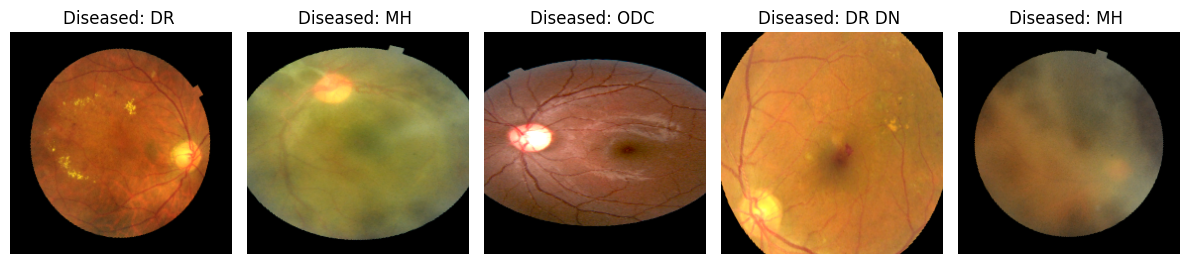

In [16]:
# Generate a batch of images and labels from the compiled image generator
batch_images, batch_labels = next(train_gen_s2_vgg19)

# Define the number of images to plot
num_images_to_plot = 5  # Example: Plot 5 images

# Plot the selected images
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(12, 4))

for i in range(num_images_to_plot):
    id = random.randint(0, (batch_images.shape[0] - 1))
    image = batch_images[id]
    label = batch_labels[id]
    
    label_name = "Healthy" if 1 not in label else "Diseased: "
    if label_name != "Healthy":
        for x in range(len(label)):
            if label[x] == 1:
                label_name += (y_train_s2[x]+" ")

    axes[i].imshow(image)
    axes[i].set_title(f"{label_name}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## Training the Models

### Setup GPU

In [14]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

### Set Adagrad Optimizer Function

In [15]:
def create_optimizer(learning_rate=0.01, acc_value=0.1):
    optimizer = tf.keras.optimizers.Adagrad(learning_rate=learning_rate, initial_accumulator_value=acc_value)
    return optimizer

opt = create_optimizer()

### Set Performance Metrics

In [16]:
acc = tf.keras.metrics.Accuracy(name="accuracy")
auc = tf.keras.metrics.AUC(num_thresholds=5000, from_logits=True)
bac = tf.keras.metrics.BinaryAccuracy(name="binary_accuracy")

### Weighted Binary Cross Entropy Function

In [19]:
'''

from keras import backend as K

def weighted_binary_crossentropy(weight_zero = 0.175, weight_one = 1):
    def loss(y_true, y_pred):
        y_true = tf.cast(y_true, y_pred.dtype)
        # Calculate the binary cross-entropy loss for each label
        bce_loss = K.binary_crossentropy(y_true, y_pred)

        # Apply the weights to positive and negative labels
        weighted_loss = y_true * weight_one * bce_loss + (1 - y_true) * weight_zero * bce_loss

        return weighted_loss

    return loss

'''

### VGG19 (s1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 20,057,281
Trainable params: 32,897
Non-trainable params: 20,024,384
_______________________________________

INFO:tensorflow:Assets written to: rfmid_model_s1_vgg19_100epochs\assets


INFO:tensorflow:Assets written to: rfmid_model_s1_vgg19_100epochs\assets


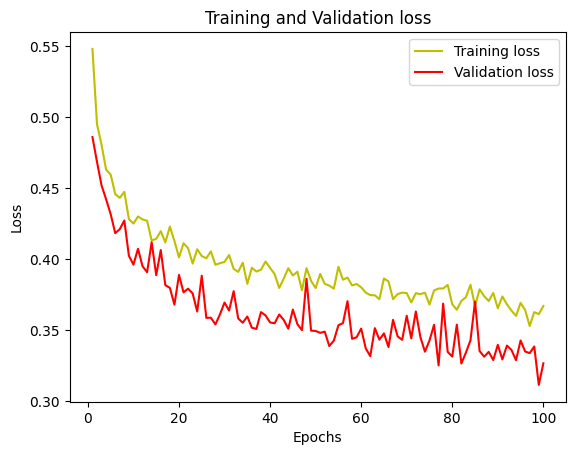

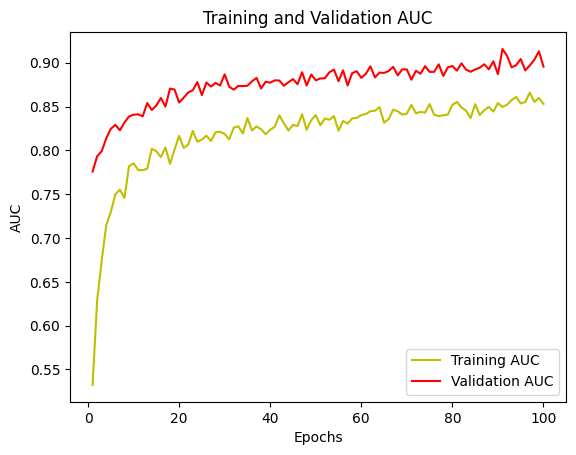

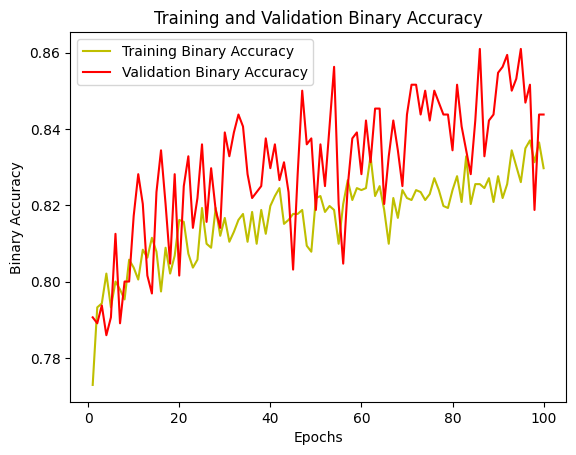

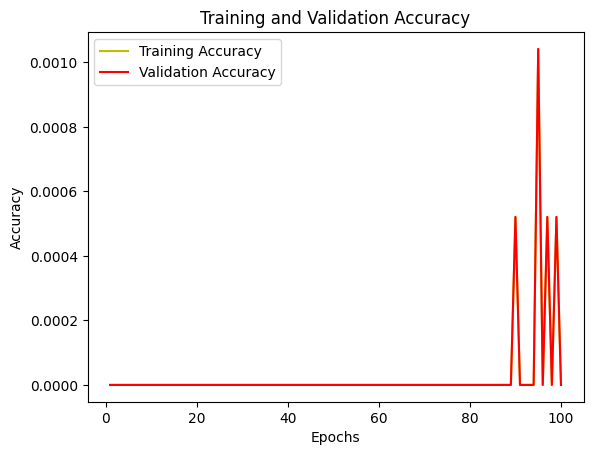

In [17]:
base_model_vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model_vgg19.trainable = False

model_s1_vgg19 = tf.keras.models.Sequential([
    base_model_vgg19,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_s1_vgg19.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[auc, bac, acc])
print(model_s1_vgg19.summary())

history = model_s1_vgg19.fit(
    train_gen_s1_vgg19,
    steps_per_epoch=len(train_gen_s1_vgg19),
    validation_data=val_gen_s1_vgg19,
    validation_steps=len(val_gen_s1_vgg19),
    epochs=100
)

save_model(model_s1_vgg19, 'rfmid_model_s1_vgg19_100epochs')

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

auroc = history.history['auc']
val_auroc = history.history['val_auc']
plt.plot(epochs, auroc, 'y', label='Training AUC')
plt.plot(epochs, val_auroc, 'r', label='Validation AUC')
plt.title('Training and Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

binacc = history.history['binary_accuracy']
val_binacc = history.history['val_binary_accuracy']
plt.plot(epochs, binacc, 'y', label='Training Binary Accuracy')
plt.plot(epochs, val_binacc, 'r', label='Validation Binary Accuracy')
plt.title('Training and Validation Binary Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Binary Accuracy')
plt.legend()
plt.show()

accu = history.history['accuracy']
val_accu = history.history['accuracy']
plt.plot(epochs,accu, 'y', label='Training Accuracy')
plt.plot(epochs, val_accu, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

tf.compat.v1.keras.backend.clear_session()
tf.compat.v1.reset_default_graph()

### Fine Tuning VGG19 (s1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 20,057,281
Trainable params: 20,057,281
Non-trainable params: 0
____________________________________________

INFO:tensorflow:Assets written to: rfmid_model_s1_vgg19_finetuned_100epochs\assets


INFO:tensorflow:Assets written to: rfmid_model_s1_vgg19_finetuned_100epochs\assets


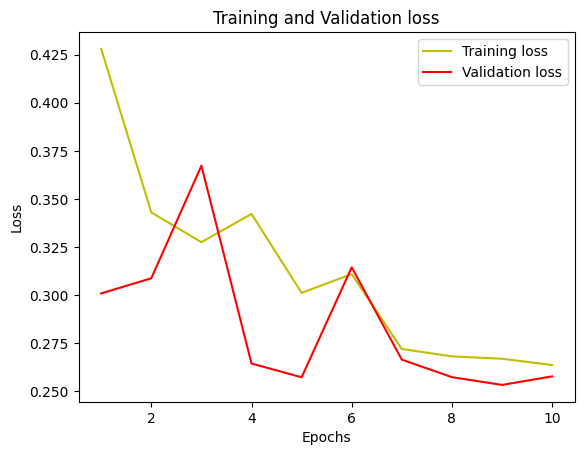

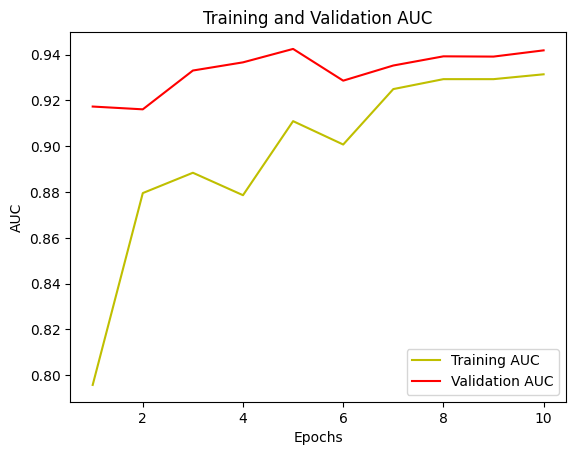

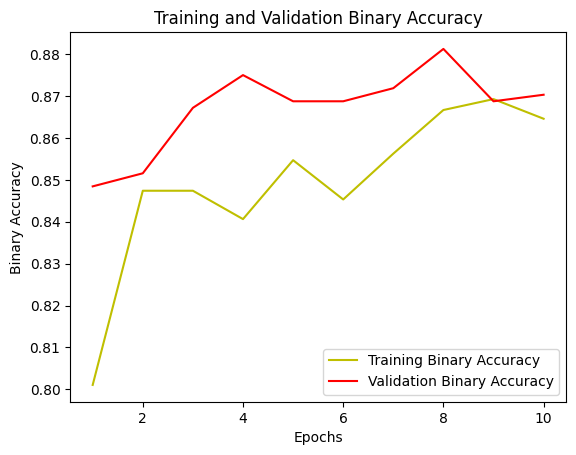

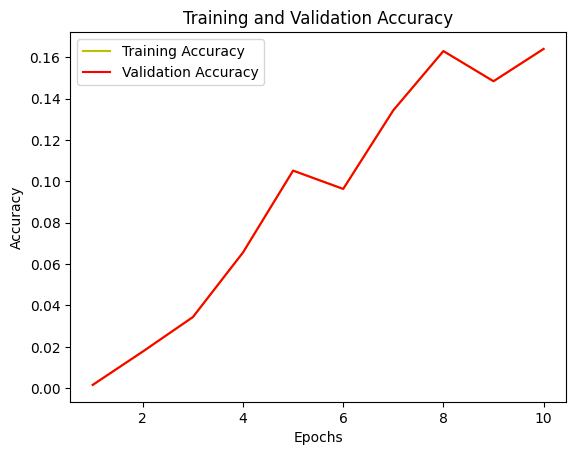

In [17]:
# Unfreeze the base_model. Note that it keeps running in inference mode
# since we passed `training=False` when calling it. This means that
# the batchnorm layers will not update their batch statistics.
# This prevents the batchnorm layers from undoing all the training
# we've done so far.
model_s1_vgg19 = load_model('rfmid_model_s1_vgg19_100epochs', compile=False)

for layer in model_s1_vgg19.layers:
    if isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = False
    else:
        layer.trainable = True

model_s1_vgg19.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss='binary_crossentropy',
    metrics=[auc, bac, acc])
print(model_s1_vgg19.summary())

history = model_s1_vgg19.fit(
    train_gen_s1_vgg19,
    steps_per_epoch=len(train_gen_s1_vgg19),
    validation_data=val_gen_s1_vgg19,
    validation_steps=len(val_gen_s1_vgg19),
    epochs=10
)

save_model(model_s1_vgg19, 'rfmid_model_s1_vgg19_finetuned_100epochs')

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

auroc = history.history['auc']
val_auroc = history.history['val_auc']
plt.plot(epochs, auroc, 'y', label='Training AUC')
plt.plot(epochs, val_auroc, 'r', label='Validation AUC')
plt.title('Training and Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

binacc = history.history['binary_accuracy']
val_binacc = history.history['val_binary_accuracy']
plt.plot(epochs, binacc, 'y', label='Training Binary Accuracy')
plt.plot(epochs, val_binacc, 'r', label='Validation Binary Accuracy')
plt.title('Training and Validation Binary Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Binary Accuracy')
plt.legend()
plt.show()

accu = history.history['accuracy']
val_accu = history.history['accuracy']
plt.plot(epochs,accu, 'y', label='Training Accuracy')
plt.plot(epochs, val_accu, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

tf.compat.v1.keras.backend.clear_session()
tf.compat.v1.reset_default_graph()

### VGG19 (s2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 28)                1820      
                                                                 
Total params: 20,059,036
Trainable params: 34,652
Non-trainable params: 20,024,384
_______________________________________

INFO:tensorflow:Assets written to: rfmid_model_s2_vgg19_100epochs\assets


INFO:tensorflow:Assets written to: rfmid_model_s2_vgg19_100epochs\assets


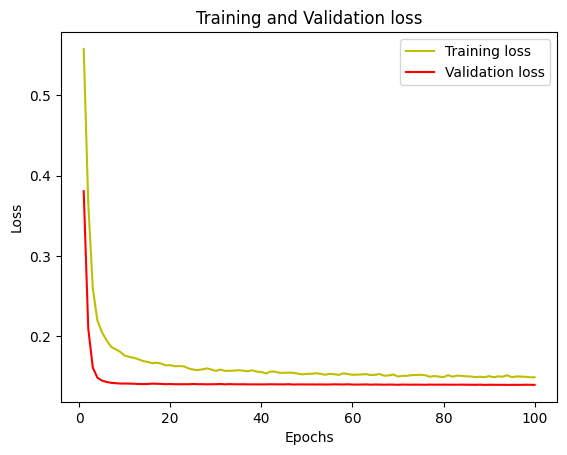

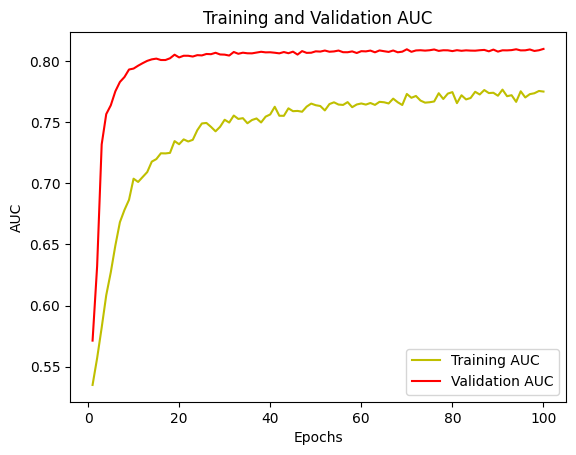

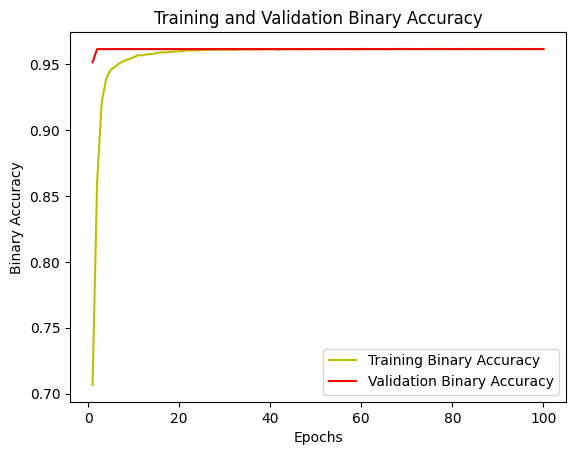

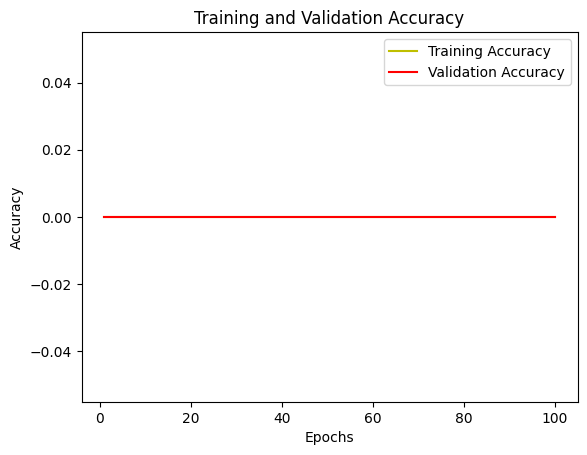

In [17]:
base_model_vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model_vgg19.trainable = False

model_s2_vgg19 = tf.keras.models.Sequential([
    base_model_vgg19,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(unq_diseases, activation='sigmoid')
])

model_s2_vgg19.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=[auc, bac, acc])
print(model_s2_vgg19.summary())

history = model_s2_vgg19.fit(
    train_gen_s2_vgg19,
    steps_per_epoch=len(train_gen_s2_vgg19),
    validation_data=val_gen_s2_vgg19,
    validation_steps=len(val_gen_s2_vgg19),
    epochs=100
)

save_model(model_s2_vgg19, 'rfmid_model_s2_vgg19_100epochs')

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

auroc = history.history['auc']
val_auroc = history.history['val_auc']
plt.plot(epochs, auroc, 'y', label='Training AUC')
plt.plot(epochs, val_auroc, 'r', label='Validation AUC')
plt.title('Training and Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

binacc = history.history['binary_accuracy']
val_binacc = history.history['val_binary_accuracy']
plt.plot(epochs, binacc, 'y', label='Training Binary Accuracy')
plt.plot(epochs, val_binacc, 'r', label='Validation Binary Accuracy')
plt.title('Training and Validation Binary Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Binary Accuracy')
plt.legend()
plt.show()

accu = history.history['accuracy']
val_accu = history.history['accuracy']
plt.plot(epochs,accu, 'y', label='Training Accuracy')
plt.plot(epochs, val_accu, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

tf.compat.v1.keras.backend.clear_session()
tf.compat.v1.reset_default_graph()

### Fine Tuning VGG19 (s2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 28)                1820      
                                                                 
Total params: 20,059,036
Trainable params: 20,059,036
Non-trainable params: 0
____________________________________________

INFO:tensorflow:Assets written to: rfmid_model_s2_vgg19_finetuned_100epochs\assets


INFO:tensorflow:Assets written to: rfmid_model_s2_vgg19_finetuned_100epochs\assets


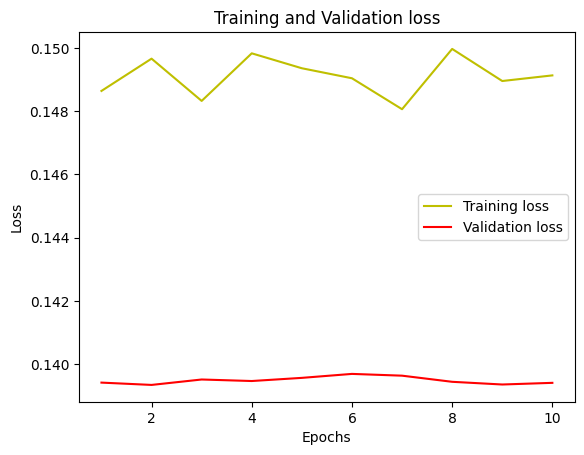

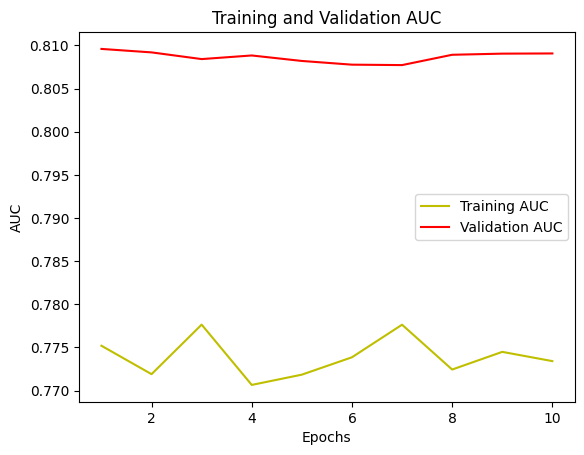

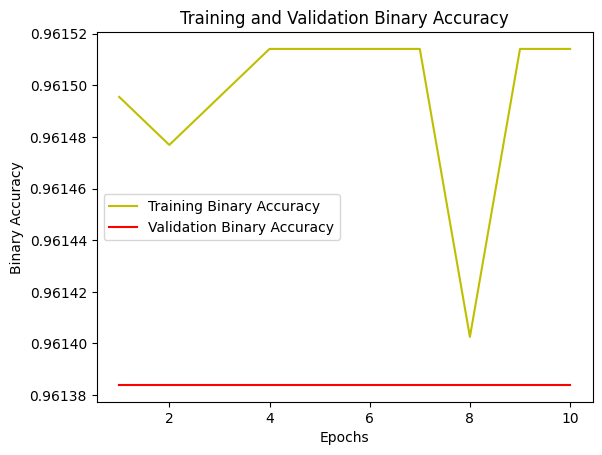

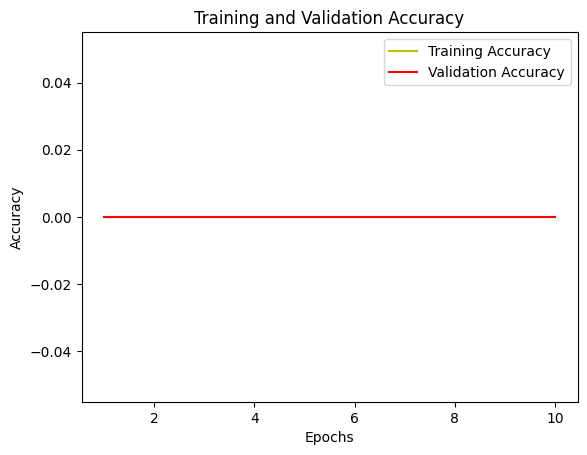

In [17]:
# Unfreeze the base_model. Note that it keeps running in inference mode
# since we passed `training=False` when calling it. This means that
# the batchnorm layers will not update their batch statistics.
# This prevents the batchnorm layers from undoing all the training
# we've done so far.
model_s2_vgg19 = load_model('rfmid_model_s2_vgg19_100epochs', compile=False)

for layer in model_s2_vgg19.layers:
    layer.trainable = False if isinstance(layer, tf.keras.layers.BatchNormalization) else True

model_s2_vgg19.compile(
    optimizer=keras.optimizers.Adagrad(learning_rate=1e-5),  # Low learning rate
    loss='binary_crossentropy',
    metrics=[auc, bac, acc])
print(model_s2_vgg19.summary())

history = model_s2_vgg19.fit(
    train_gen_s2_vgg19,
    steps_per_epoch=len(train_gen_s2_vgg19),
    validation_data=val_gen_s2_vgg19,
    validation_steps=len(val_gen_s2_vgg19),
    epochs=10
)

save_model(model_s2_vgg19, 'rfmid_model_s2_vgg19_finetuned_100epochs')

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

auroc = history.history['auc']
val_auroc = history.history['val_auc']
plt.plot(epochs, auroc, 'y', label='Training AUC')
plt.plot(epochs, val_auroc, 'r', label='Validation AUC')
plt.title('Training and Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

binacc = history.history['binary_accuracy']
val_binacc = history.history['val_binary_accuracy']
plt.plot(epochs, binacc, 'y', label='Training Binary Accuracy')
plt.plot(epochs, val_binacc, 'r', label='Validation Binary Accuracy')
plt.title('Training and Validation Binary Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Binary Accuracy')
plt.legend()
plt.show()

accu = history.history['accuracy']
val_accu = history.history['accuracy']
plt.plot(epochs,accu, 'y', label='Training Accuracy')
plt.plot(epochs, val_accu, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

tf.compat.v1.keras.backend.clear_session()
tf.compat.v1.reset_default_graph()

### EfficientNetV2M (s1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-m (Functiona  (None, 12, 12, 1280)     53150388  
 l)                                                              
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 53,232,437
Trainable params: 82,049
Non-tr

INFO:tensorflow:Assets written to: rfmid_model_s1_v2m_100epochs\assets


INFO:tensorflow:Assets written to: rfmid_model_s1_v2m_100epochs\assets


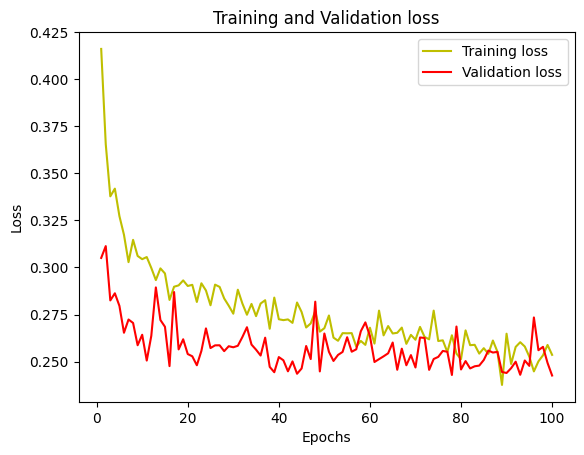

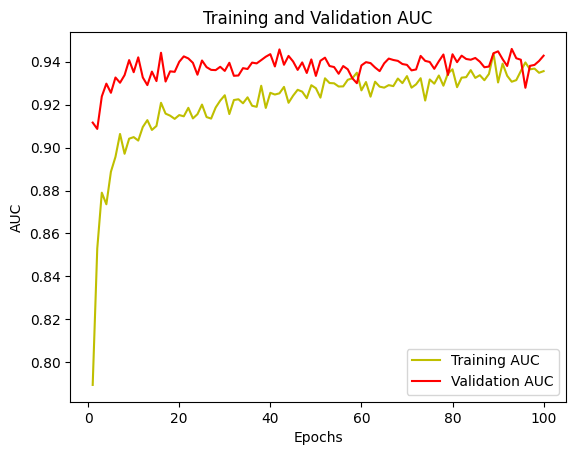

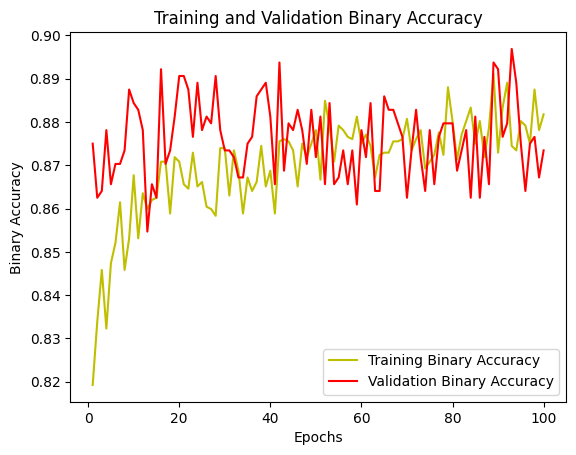

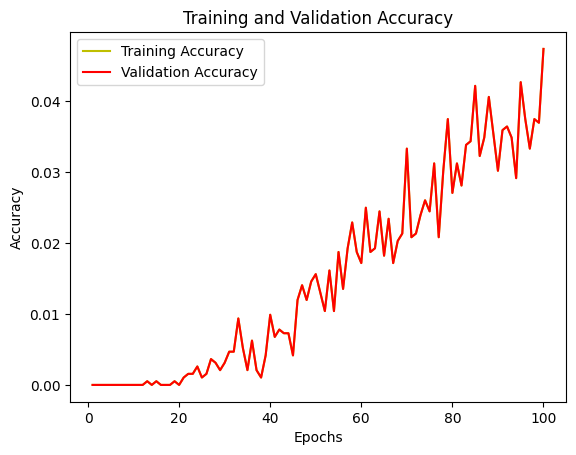

In [17]:
base_model_v2m = EfficientNetV2M(weights='imagenet', include_top=False, input_shape=(384,384,3))
base_model_v2m.trainable = False

model_s1_v2m = tf.keras.models.Sequential([
    base_model_v2m,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_s1_v2m.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[auc, bac, acc])
print(model_s1_v2m.summary())

history = model_s1_v2m.fit(
    train_gen_s1_v2m,
    steps_per_epoch=len(train_gen_s1_v2m),
    validation_data=val_gen_s1_v2m,
    validation_steps=len(val_gen_s1_v2m),
    epochs=100
)

save_model(model_s1_v2m, 'rfmid_model_s1_v2m_100epochs')

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

auroc = history.history['auc']
val_auroc = history.history['val_auc']
plt.plot(epochs, auroc, 'y', label='Training AUC')
plt.plot(epochs, val_auroc, 'r', label='Validation AUC')
plt.title('Training and Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

binacc = history.history['binary_accuracy']
val_binacc = history.history['val_binary_accuracy']
plt.plot(epochs, binacc, 'y', label='Training Binary Accuracy')
plt.plot(epochs, val_binacc, 'r', label='Validation Binary Accuracy')
plt.title('Training and Validation Binary Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Binary Accuracy')
plt.legend()
plt.show()

accu = history.history['accuracy']
val_accu = history.history['accuracy']
plt.plot(epochs,accu, 'y', label='Training Accuracy')
plt.plot(epochs, val_accu, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

tf.compat.v1.keras.backend.clear_session()
tf.compat.v1.reset_default_graph()

### EfficientNetV2M (s2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-m (Functiona  (None, 12, 12, 1280)     53150388  
 l)                                                              
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 28)                1820      
                                                                 
Total params: 53,234,192
Trainable params: 83,804
Non-tr

INFO:tensorflow:Assets written to: rfmid_model_s2_v2m_100epochs\assets


INFO:tensorflow:Assets written to: rfmid_model_s2_v2m_100epochs\assets


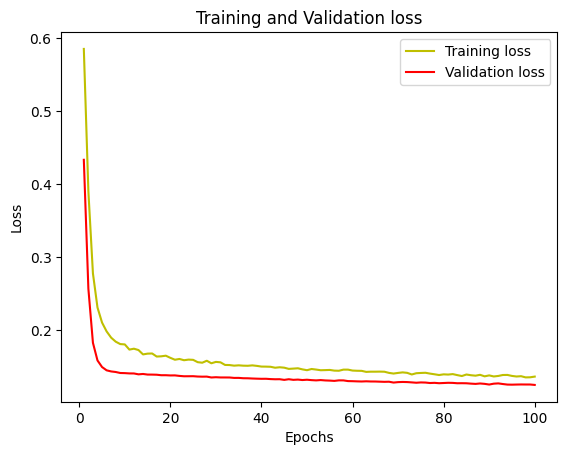

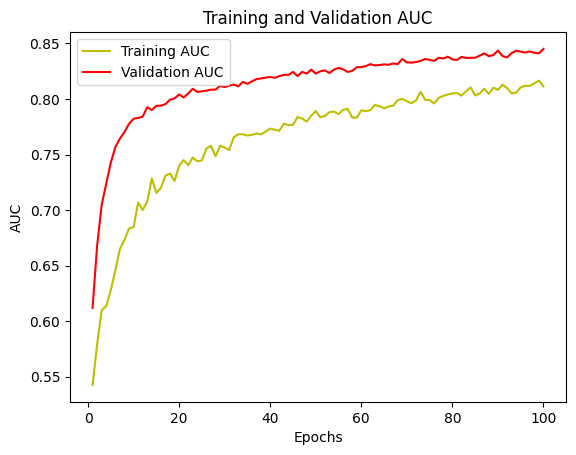

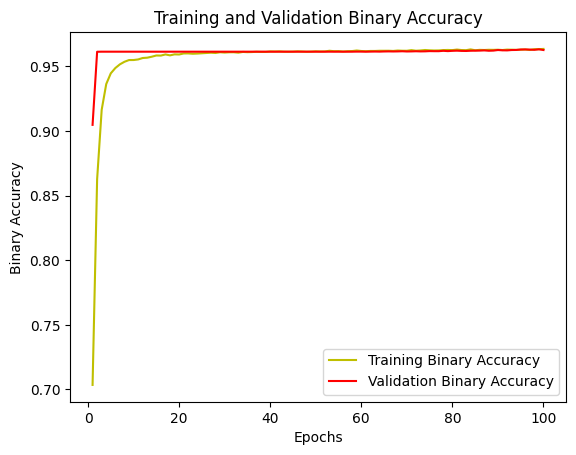

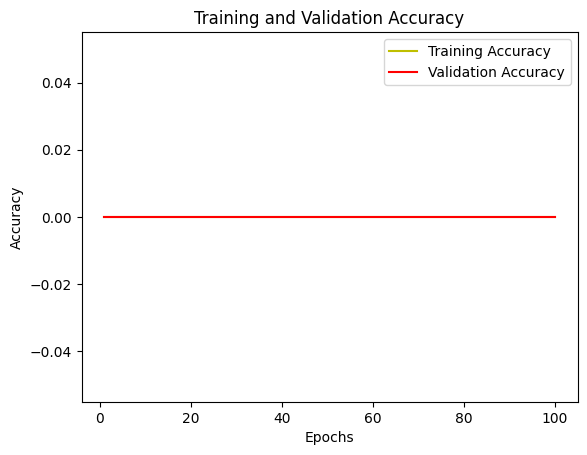

In [17]:
base_model_v2m = EfficientNetV2M(weights='imagenet', include_top=False, input_shape=(384,384,3))
base_model_v2m.trainable = False

model_s2_v2m = tf.keras.models.Sequential([
    base_model_v2m,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(unq_diseases, activation='sigmoid')
])

model_s2_v2m.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=[auc, bac, acc])
print(model_s2_v2m.summary())

history = model_s2_v2m.fit(
    train_gen_s2_v2m,
    steps_per_epoch=len(train_gen_s2_v2m),
    validation_data=val_gen_s2_v2m,
    validation_steps=len(val_gen_s2_v2m),
    epochs=100
)

save_model(model_s2_v2m, 'rfmid_model_s2_v2m_100epochs')

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

auroc = history.history['auc']
val_auroc = history.history['val_auc']
plt.plot(epochs, auroc, 'y', label='Training AUC')
plt.plot(epochs, val_auroc, 'r', label='Validation AUC')
plt.title('Training and Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

binacc = history.history['binary_accuracy']
val_binacc = history.history['val_binary_accuracy']
plt.plot(epochs, binacc, 'y', label='Training Binary Accuracy')
plt.plot(epochs, val_binacc, 'r', label='Validation Binary Accuracy')
plt.title('Training and Validation Binary Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Binary Accuracy')
plt.legend()
plt.show()

accu = history.history['accuracy']
val_accu = history.history['accuracy']
plt.plot(epochs,accu, 'y', label='Training Accuracy')
plt.plot(epochs, val_accu, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

tf.compat.v1.keras.backend.clear_session()
tf.compat.v1.reset_default_graph()

### ConvNeXtLarge (s1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convnext_large (Functional)  (None, 7, 7, 1536)       196230336 
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                98368     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 196,328,769
Trainable params: 98,433
Non-trainable params: 196,230,336
_____________________________________

INFO:tensorflow:Assets written to: rfmid_model_s1_cnextl_100epochs\assets


INFO:tensorflow:Assets written to: rfmid_model_s1_cnextl_100epochs\assets


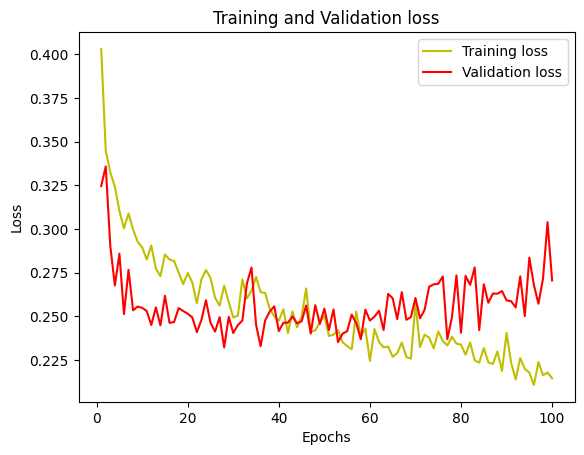

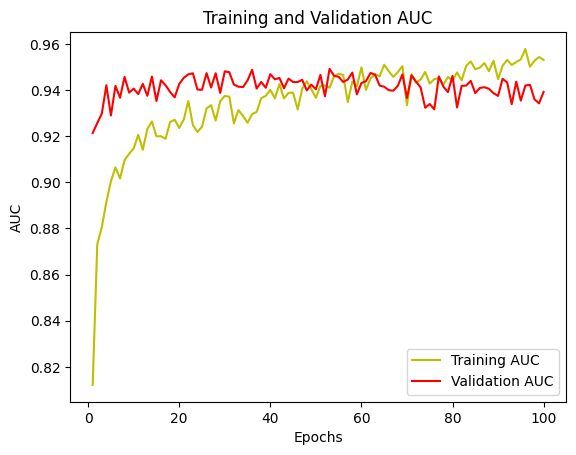

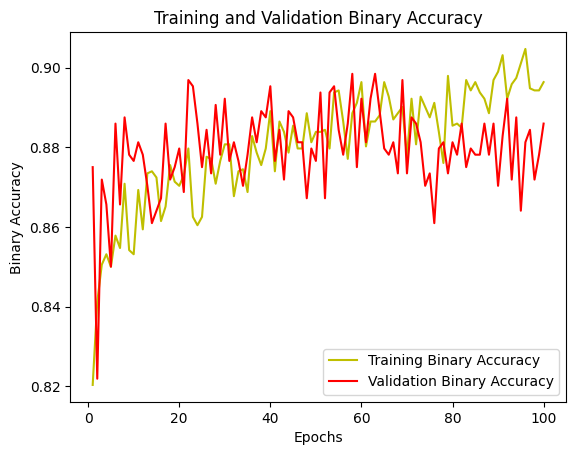

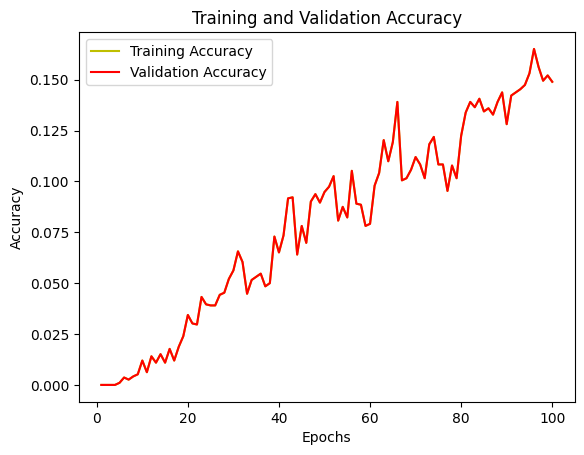

In [16]:
base_model_cnextl = ConvNeXtLarge(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model_cnextl.trainable = False

model_s1_cnextl = tf.keras.models.Sequential([
    base_model_cnextl,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_s1_cnextl.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[auc, bac, acc])
print(model_s1_cnextl.summary())

history = model_s1_cnextl.fit(
    train_gen_s1_cnextl,
    steps_per_epoch=len(train_gen_s1_cnextl),
    validation_data=val_gen_s1_cnextl,
    validation_steps=len(val_gen_s1_cnextl),
    epochs=100
)

save_model(model_s1_cnextl, 'rfmid_model_s1_cnextl_100epochs')

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

auroc = history.history['auc']
val_auroc = history.history['val_auc']
plt.plot(epochs, auroc, 'y', label='Training AUC')
plt.plot(epochs, val_auroc, 'r', label='Validation AUC')
plt.title('Training and Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

binacc = history.history['binary_accuracy']
val_binacc = history.history['val_binary_accuracy']
plt.plot(epochs, binacc, 'y', label='Training Binary Accuracy')
plt.plot(epochs, val_binacc, 'r', label='Validation Binary Accuracy')
plt.title('Training and Validation Binary Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Binary Accuracy')
plt.legend()
plt.show()

accu = history.history['accuracy']
val_accu = history.history['accuracy']
plt.plot(epochs,accu, 'y', label='Training Accuracy')
plt.plot(epochs, val_accu, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

tf.compat.v1.keras.backend.clear_session()
tf.compat.v1.reset_default_graph()

### ConvNeXtLarge (s2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convnext_large (Functional)  (None, 7, 7, 1536)       196230336 
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                98368     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 28)                1820      
                                                                 
Total params: 196,330,524
Trainable params: 100,188
Non-trainable params: 196,230,336
____________________________________

INFO:tensorflow:Assets written to: rfmid_model_s2_cnextl_100epochs\assets


INFO:tensorflow:Assets written to: rfmid_model_s2_cnextl_100epochs\assets


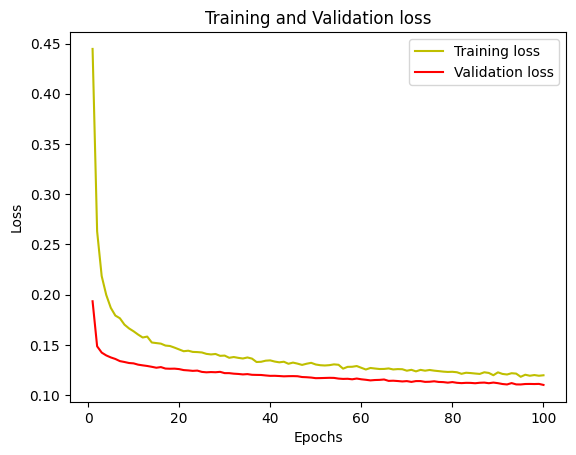

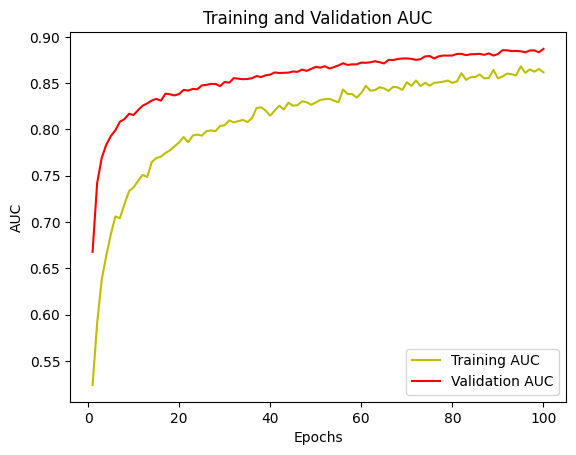

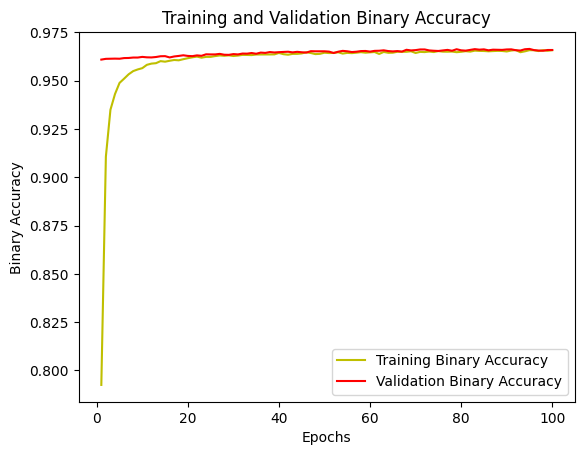

NameError: name 'meanprec' is not defined

In [17]:
base_model_cnextl = ConvNeXtLarge(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model_cnextl.trainable = False

model_s2_cnextl = tf.keras.models.Sequential([
    base_model_cnextl,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(unq_diseases, activation='sigmoid')
])

model_s2_cnextl.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=[auc, bac, acc])
print(model_s2_cnextl.summary())

history = model_s2_cnextl.fit(
    train_gen_s2_cnextl,
    steps_per_epoch=len(train_gen_s2_cnextl),
    validation_data=val_gen_s2_cnextl,
    validation_steps=len(val_gen_s2_cnextl),
    epochs=100
)

save_model(model_s2_cnextl, 'rfmid_model_s2_cnextl_100epochs')

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

auroc = history.history['auc']
val_auroc = history.history['val_auc']
plt.plot(epochs, auroc, 'y', label='Training AUC')
plt.plot(epochs, val_auroc, 'r', label='Validation AUC')
plt.title('Training and Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

binacc = history.history['binary_accuracy']
val_binacc = history.history['val_binary_accuracy']
plt.plot(epochs, binacc, 'y', label='Training Binary Accuracy')
plt.plot(epochs, val_binacc, 'r', label='Validation Binary Accuracy')
plt.title('Training and Validation Binary Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Binary Accuracy')
plt.legend()
plt.show()

accu = history.history['accuracy']
val_accu = history.history['accuracy']
plt.plot(epochs,accu, 'y', label='Training Accuracy')
plt.plot(epochs, val_accu, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

tf.compat.v1.keras.backend.clear_session()
tf.compat.v1.reset_default_graph()

## Testing the Models

### VGG19 (s1)

In [17]:
model_s1_vgg19 = load_model('rfmid_model_s1_vgg19_finetuned_100epochs', compile = False)
model_s1_vgg19.trainable=False

model_s1_vgg19.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[auc, bac, acc])

model_s1_vgg19.evaluate(test_gen_s1_vgg19)

tf.compat.v1.keras.backend.clear_session()
tf.compat.v1.reset_default_graph()

20/20 [==============================] - 52s 2s/step - loss: 0.2512 - auc: 0.9457 - binary_accuracy: 0.9016 - accuracy: 0.2094


### VGG19 (s2)

In [17]:
model_s2_vgg19 = load_model('rfmid_model_s2_vgg19_finetuned_100epochs', compile = False)
model_s2_vgg19.trainable=False

model_s2_vgg19.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=[auc, bac, acc])

model_s2_vgg19.evaluate(test_gen_s2_vgg19)

tf.compat.v1.keras.backend.clear_session()
tf.compat.v1.reset_default_graph()

20/20 [==============================] - 47s 2s/step - loss: 0.1343 - auc: 0.8150 - binary_accuracy: 0.9627 - accuracy: 0.0000e+00


### EfficientNetV2M (s1)

In [17]:
model_s1_v2m = load_model('rfmid_model_s1_v2m_100epochs', compile = False)
model_s1_v2m.trainable=False

model_s1_v2m.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[auc, bac, acc])

model_s1_v2m.evaluate(test_gen_s1_v2m)

tf.compat.v1.keras.backend.clear_session()
tf.compat.v1.reset_default_graph()

20/20 [==============================] - 59s 3s/step - loss: 0.2102 - auc: 0.9613 - binary_accuracy: 0.9281 - accuracy: 0.0125


### EfficientNetV2M (s2)

In [17]:
model_s2_v2m = load_model('rfmid_model_s2_v2m_100epochs', compile = False)
model_s2_v2m.trainable=False

model_s2_v2m.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=[auc, bac, acc])

model_s2_v2m.evaluate(test_gen_s2_v2m)

tf.compat.v1.keras.backend.clear_session()
tf.compat.v1.reset_default_graph()

20/20 [==============================] - 58s 3s/step - loss: 0.1216 - auc: 0.8467 - binary_accuracy: 0.9645 - accuracy: 0.0000e+00


### ConvNeXtLarge (s1)

In [17]:
model_s1_cnextl = load_model('rfmid_model_s1_cnextl_100epochs', compile = False)
model_s1_cnextl.trainable=False

model_s1_cnextl.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[auc, bac, acc])

model_s1_cnextl.evaluate(test_gen_s1_cnextl)

tf.compat.v1.keras.backend.clear_session()
tf.compat.v1.reset_default_graph()

20/20 [==============================] - 46s 2s/step - loss: 0.2173 - auc: 0.9620 - binary_accuracy: 0.9062 - accuracy: 0.1562


### ConvNeXtLarge (s2)

In [17]:
model_s2_cnextl = load_model('rfmid_model_s2_cnextl_100epochs', compile = False)
model_s2_cnextl.trainable=False

model_s2_cnextl.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=[auc, bac, acc])

model_s2_cnextl.evaluate(test_gen_s2_cnextl)

tf.compat.v1.keras.backend.clear_session()
tf.compat.v1.reset_default_graph()

20/20 [==============================] - 46s 2s/step - loss: 0.1060 - auc: 0.8913 - binary_accuracy: 0.9673 - accuracy: 0.0000e+00
